In [17]:
import numpy as np

In [18]:
sentences = ["cat is cute", "dog is lovely", "shark is hungry"]

In [19]:
tokenized_sentences = [sentence.split() for sentence in sentences]

In [20]:
# Initialize hyperparameters
embedding_dim = 2
learning_rate = 0.01
epochs = 10000

In [21]:
# Initialize word vectors randomly
vocab = set(word for sentence in tokenized_sentences for word in sentence)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

vocab_size = len(vocab)

word_vectors = np.random.uniform(-1, 1, (vocab_size, embedding_dim))

In [22]:
for epoch in range(epochs):
    for sentence in tokenized_sentences:
        for target_word_index, target_word in enumerate(sentence):
            context_indices = [
                target_word_index - 1,
                target_word_index + 1,
            ]  # Use a context window of size 1

            for context_index in context_indices:
                if 0 <= context_index < len(sentence):
                    context_word = sentence[context_index]
                    target_vector = word_vectors[word_to_index[target_word]]
                    context_vector = word_vectors[word_to_index[context_word]]
                    dot_product = np.dot(target_vector, context_vector)

                    # Calculate the gradient and update word vectors
                    grad = (1 / (1 + np.exp(-dot_product))) - 1
                    word_vectors[word_to_index[target_word]] -= (
                        learning_rate * grad * context_vector
                    )
                    word_vectors[word_to_index[context_word]] -= (
                        learning_rate * grad * target_vector
                    )
    if (epoch % 20) == 0:
        print(f'epoch: {epoch}')
        for word, index in word_to_index.items():
            print(f"{word :10}: {word_vectors[index]}")

In [23]:
for word, index in word_to_index.items():
    print(f"{word :10}: {word_vectors[index]}")

is        : [2.05902283 4.05723731]
lovely    : [1.63369273 1.35760616]
cat       : [0.51992785 1.91362133]
cute      : [1.41225291 1.49124996]
shark     : [1.21067392 1.61917443]
dog       : [0.67158539 1.85524332]
hungry    : [0.12277986 2.13146343]


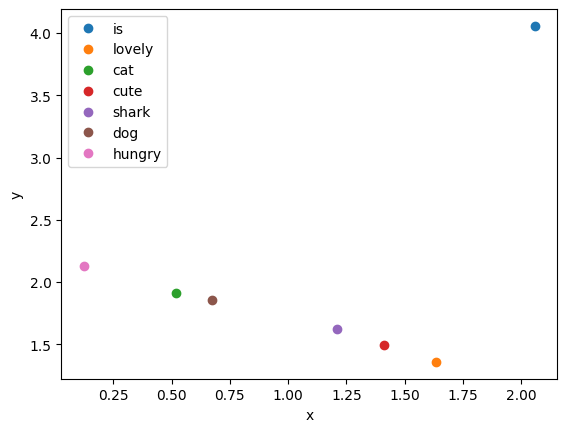

In [24]:
import matplotlib.pyplot as plt

# Plot the points
for word, index in word_to_index.items():
    plt.plot(word_vectors[index][0], word_vectors[index][1], "o", label=word)

# Label the axes
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.legend()
plt.show()